# ---------------------------Data Understanding----------------------------

In [1]:
#Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import ParameterSampler
from sklearn import metrics

In [2]:
#Set display settings
pd.set_option('display.max_colwidth', 80)

In [3]:
#Set display settings
path='./data'
os.chdir(path)

In [4]:
#Set display settings
user_features=pd.read_csv("user_features.csv")
product_features=pd.read_csv("product_features.csv")
click_history=pd.read_csv("click_history.csv")

## Explore "user_features":

In [5]:
#Print the shape
print("\'user_features\':",user_features.shape )

'user_features': (12000, 4)


### Which data_types does "user_features" contain?

In [6]:
user_features.dtypes

user_id                     int64
number_of_clicks_before    object
ordered_before               bool
personal_interests         object
dtype: object

### What does "user_features" dataset look like?

In [7]:
user_features.head()

,user_id,number_of_clicks_before,ordered_before,personal_interests
0,104939,2,True,"['body', 'makeup', 'nail', 'hand', 'foot', 'men_fragrance', 'fragrance', 'ha..."
1,101562,2,True,"['men_skincare', 'men_fragrance', 'tools', 'skincare', 'nail', 'body', 'make..."
2,102343,2,True,"['tools', 'makeup', 'foot', 'nail']"
3,106728,5,True,"['hand', 'men_skincare']"
4,107179,0,True,"['makeup', 'body', 'skincare', 'foot', 'men_skincare', 'fragrance', 'hair']"


### How many unique value does each column of "user_features" have?

In [8]:
user_features.nunique()

user_id                    12000
number_of_clicks_before        7
ordered_before                 2
personal_interests          8316
dtype: int64

### Does column "personal_interest" contain any empty list? 

In [9]:
(user_features.personal_interests.astype('str')=='[]').sum()

1096

### How many douplicated "user_id" there is in "user_features"?

In [10]:
user_features.user_id.duplicated().sum()

0

### How many missing values there are in "user_features"?

In [11]:
user_features.isnull().sum()

user_id                      0
number_of_clicks_before    500
ordered_before               0
personal_interests           0
dtype: int64

### View the unique values of "number_of_clicks_before':

In [12]:
user_features.number_of_clicks_before.unique()

array(['2', '5', '0', '4', '1', '6+', nan, '3'], dtype=object)

## Data exploration summary for "user_features": There is no duplicated row; there is no duplicated user_id; there are some missing values in "number_of_clicks_before". Also, column "personal_intrest" has some empty list.

## Explore "product_features"

In [13]:
print("\'product_features\':",product_features.shape)

'product_features': (1000, 5)


### What data types does "product_features" dataset have?

In [14]:
product_features.dtypes

product_id             int64
category              object
on_sale                 bool
number_of_reviews      int64
avg_review_score     float64
dtype: object

### How many unique values does each column have?

In [15]:
product_features.nunique()

product_id           1000
category               11
on_sale                 2
number_of_reviews     602
avg_review_score      828
dtype: int64

### How does "product_features" look like?

In [16]:
product_features.head()

,product_id,category,on_sale,number_of_reviews,avg_review_score
0,1134,tools,False,101,3.349452
1,1846,skincare,False,111,5.000000
2,1762,fragrance,False,220,4.882706
3,1254,hair,True,446,5.000000
4,1493,body,True,513,-1.000000


### Is there any duplicated "product_id"?

In [17]:
product_features.product_id.duplicated().sum()

0

### Is there any duplicated rows?

In [18]:
product_features.product_id.duplicated().sum()

0

### How many missing values?

In [ ]:
product_features.isnull().sum()

product_id           0
category             0
on_sale              0
number_of_reviews    0
avg_review_score     0
dtype: int64

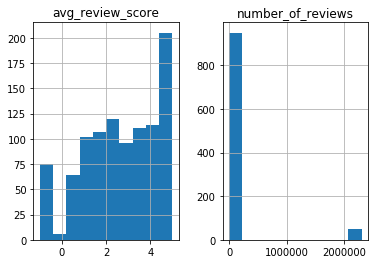

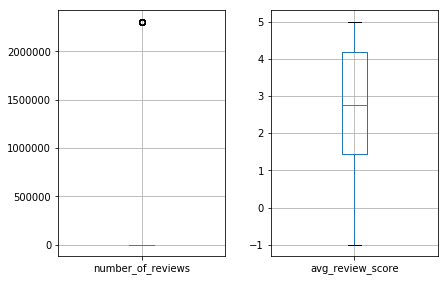

In [ ]:
product_features.describe()
product_features[["number_of_reviews","avg_review_score"]].hist()
fig, axs = plt.subplots(ncols = 2,figsize=(6,4))
plt.tight_layout(w_pad = 1.5)
product_features[["number_of_reviews"]].boxplot(ax = axs[0])
product_features[["avg_review_score"]].boxplot(ax = axs[1])

## Data exploration summary for "product_features": There is no duplicated row; there is no duplicated product_id; there is no missing values. The box plot for "number of reviews" shows there are some outliers. Also, avg_review_score is negetive for some data points.

## Explore "click_history"

In [ ]:
print("\'click_history\':",click_history.shape)

'click_history': (35990, 3)


### Which data types does "click_history" contain?

In [ ]:
click_history.dtypes

user_id       int64
product_id    int64
clicked        bool
dtype: object

### See the head of "click_history":

In [ ]:
click_history.head()

,user_id,product_id,clicked
0,104863,1350,False
1,108656,1321,True
2,100120,1110,False
3,104838,1443,True
4,107304,1397,True


### Is there any missing values?

In [ ]:
click_history.isnull().sum()

user_id       0
product_id    0
clicked       0
dtype: int64

### Is there any douplicated row in the "click_history" dataset?

In [ ]:
click_history.duplicated().sum()

0

### Is there any douplicated row in the "click_history" dataset?

In [ ]:
click_history.duplicated().sum()

0

## Data exploration summary for "click_history": It has 3 features, "user_id" , "product_id" and "clicked". Clicked is Boolean and it would be the target variable. Also, this data set does not have any duplicated rows, duplicated product_id or missing values.

# ------------------------Data Cleaning and Preprocessing--------------------------------------

## Remove negetive values of "product_features.avg_review_score"

In [ ]:
lab=product_features[product_features.avg_review_score <0].index
product_features.drop(lab, axis=0,inplace=True)

## Merge data sets

In [ ]:
merged_data=click_history.merge(product_features,on="product_id",how="inner").merge(user_features,on="user_id",how="inner")
merged_data.shape

(33176, 10)

In [ ]:
merged_data.head(5)

,user_id,product_id,clicked,category,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,personal_interests
0,104863,1350,False,nail,False,136,2.653361,2,True,"['hair', 'body']"
1,104863,1617,True,foot,True,279,4.924063,2,True,"['hair', 'body']"
2,104863,1959,False,body,True,540,3.049224,2,True,"['hair', 'body']"
3,104863,1920,False,body,True,776,1.562768,2,True,"['hair', 'body']"
4,104863,1138,False,makeup,True,104,1.996069,2,True,"['hair', 'body']"


In [ ]:
merged_data.duplicated().sum()

0

In [ ]:
#Character replacement
merged_data.personal_interests=merged_data.personal_interests.str.replace('\[','')
merged_data.personal_interests=merged_data.personal_interests.str.replace('\]','')
merged_data.personal_interests=merged_data.personal_interests.str.replace('\'','')
merged_data.personal_interests=merged_data.personal_interests.str.replace(',','')

In [ ]:
#View the head after the latest change
merged_data.head(3)

,user_id,product_id,clicked,category,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,personal_interests
0,104863,1350,False,nail,False,136,2.653361,2,True,hair body
1,104863,1617,True,foot,True,279,4.924063,2,True,hair body
2,104863,1959,False,body,True,540,3.049224,2,True,hair body


In [ ]:
#Split the column of "personal_interests" :
merged_data = merged_data.join(pd.DataFrame(merged_data['personal_interests'].str.split().values.tolist()))
### Drop "personal_interests":
merged_data.drop(['personal_interests'],axis=1,inplace=True)
merged_data.shape
merged_data.head(3)

,user_id,product_id,clicked,category,on_sale,number_of_reviews,avg_review_score,number_of_clicks_before,ordered_before,0,1,2,3,4,5,6,7,8,9
0,104863,1350,False,nail,False,136,2.653361,2,True,hair,body,None,None,None,None,None,None,None,None
1,104863,1617,True,foot,True,279,4.924063,2,True,hair,body,None,None,None,None,None,None,None,None
2,104863,1959,False,body,True,540,3.049224,2,True,hair,body,None,None,None,None,None,None,None,None


## The aim of this part is to make a dataframe so that all columns of 0 to 9 of merged_data_2 be stacked in one column.

In [ ]:
df0=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",0]]
df0.rename(columns={0:'personal_interests'},inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [ ]:
df0=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",0]]
df0.rename(columns={0:'personal_interests'},inplace=True)
df1=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",1]]
df1.rename(columns={1:'personal_interests'},inplace=True)
df2=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",2]]
df2.rename(columns={2:'personal_interests'},inplace=True)
df3=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",3]]
df3.rename(columns={3:'personal_interests'},inplace=True)
df4=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",4]]
df4.rename(columns={4:'personal_interests'},inplace=True)
df5=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",5]]
df5.rename(columns={5:'personal_interests'},inplace=True)
df6=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",6]]
df6.rename(columns={6:'personal_interests'},inplace=True)
df7=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",7]]
df7.rename(columns={7:'personal_interests'},inplace=True)
df8=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",8]]
df8.rename(columns={8:'personal_interests'},inplace=True)
df9=merged_data[["clicked","product_id","category","on_sale","number_of_reviews","avg_review_score",
                   "user_id","number_of_clicks_before","ordered_before",9]]
df9.rename(columns={9:'personal_interests'},inplace=True)

mydata=pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9])
mydata.drop_duplicates(inplace=True)
mydata.dropna(subset=['personal_interests'],inplace=True)
mydata.shape
mydata.nunique()
mydata.isnull().sum()

clicked                       0
product_id                    0
category                      0
on_sale                       0
number_of_reviews             0
avg_review_score              0
user_id                       0
number_of_clicks_before    7009
ordered_before                0
personal_interests            0
dtype: int64

In [ ]:
#Drop the rows for which "number_of_clicks_before" is missing
mydata.dropna(subset=['number_of_clicks_before'],inplace=True)

In [ ]:
#Convert the categoric and boolean variables to numeric
for col in mydata.columns:
    if mydata[col].dtype in [bool,object] :
        mydata[col]=mydata[col].astype('category').cat.codes       

In [ ]:
print("shape of 'mydata':",mydata.shape)
mydata.head()

shape of 'mydata': (157561, 10)


,clicked,product_id,category,on_sale,number_of_reviews,avg_review_score,user_id,number_of_clicks_before,ordered_before,personal_interests
0,0,1350,8,0,136,2.653361,104863,2,1,3
1,1,1617,1,1,279,4.924063,104863,2,1,3
2,0,1959,0,1,540,3.049224,104863,2,1,3
3,0,1920,0,1,776,1.562768,104863,2,1,3
4,0,1138,5,1,104,1.996069,104863,2,1,3


## Is the target variable well_balanced?

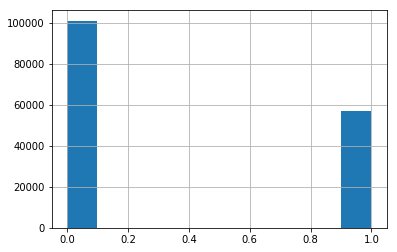

In [ ]:
mydata.clicked.hist()

## It seems that we have more target variables labeled as zero than one. So we are dealing with an imbalanced data.

# -----------------------------Model Generation and Evaluation------------------------------

In [ ]:
y=mydata.iloc[:,0]
X=mydata.iloc[:,1:10]

In [ ]:
X.head()

,product_id,category,on_sale,number_of_reviews,avg_review_score,user_id,number_of_clicks_before,ordered_before,personal_interests
0,1350,8,0,136,2.653361,104863,2,1,3
1,1617,1,1,279,4.924063,104863,2,1,3
2,1959,0,1,540,3.049224,104863,2,1,3
3,1920,0,1,776,1.562768,104863,2,1,3
4,1138,5,1,104,1.996069,104863,2,1,3


In [ ]:
#Split to train and test
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [ ]:
#Rescale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Fatemeh Goudarzi\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Fatemeh Goudarzi\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Whenever I find the best model for a specific classifier, I will put the score, classifier name and the corresponding parameters in the three lists of best_scores,best_models and best params.
## At the end, I will make a data frame and will find the best classifier. 
## Models comparison is based on AUC_ROC score of the test dataset.

In [ ]:
best_scores=[]# will hold the best scores
best_models=[]# will hold the the name of classifier
best_params=[]# will hold the corresponding parameters of the best model.

## Logestic Regression

In [ ]:
grid_param={               
            'solver' :['lbfgs', 'liblinear', 'sag', 'saga'], 
            'class_weight':['balanced',None],
            'C':[0.00001,0.0001,0.001,0.01]   
            }   

In [ ]:
best_score=0
c_train_score=0
parameters=[]
lr_test_auc_scores=[] 

In [ ]:
for p in ParameterGrid(grid_param):
    clf= linear_model.LogisticRegression()
    clf.set_params(**p)
    parameters.append(p)
    fitted=clf.fit(X_train_scaled,y_train)
    
    lr_train_pred=fitted.predict(X_train_scaled)
    lr_test_pred=fitted.predict(X_test_scaled)
    
    lr_train_auc = metrics.roc_auc_score(y_train,lr_train_pred)
    lr_test_auc = metrics.roc_auc_score(y_test,lr_test_pred)
    lr_test_auc_scores.append(lr_test_auc)
    if lr_test_auc > best_score:
            best_param=p
            best_score=lr_test_auc
            c_train_score=lr_train_auc
print (best_param, ", best score:","{:.2%}".format(best_score),' ,correspinding train score:',"{:.2%}".format(c_train_score))

{'C': 0.0001, 'class_weight': 'balanced', 'solver': 'sag'} , best score: 58.71%  ,correspinding train score: 58.71%


In [ ]:
best_scores.append(best_score)
best_models.append("Logestic Regression")
best_params.append(best_param)

## Decision Tree

In [ ]:
grid_param={'criterion':['gini','entropy'],
            'max_depth':range(3,20)
            }   

In [ ]:
best_score=0
c_train_score=0
parameters=[]
dt_test_auc_scores=[]

In [ ]:
for p in ParameterGrid(grid_param):
    clf= tree.DecisionTreeClassifier()
    clf.set_params(**p)
    parameters.append(p)
    fitted=clf.fit(X_train_scaled,y_train)
    
    dt_train_pred=fitted.predict(X_train_scaled)
    dt_test_pred=fitted.predict(X_test_scaled)
    
    dt_train_auc = metrics.roc_auc_score(y_train,dt_train_pred)
    dt_test_auc = metrics.roc_auc_score(y_test,dt_test_pred)
    dt_test_auc_scores.append(dt_test_auc)
    if dt_test_auc > best_score:
            best_param=p
            c_train_score=dt_train_auc
            best_score=dt_test_auc            
print (best_param, ", best test score:","{:.2%}".format(best_score),' ,correspinding train score:',"{:.2%}".format(c_train_score))
best_scores.append(best_score)
best_models.append("Decision Tree")
best_params.append(best_param)

{'criterion': 'gini', 'max_depth': 19} , best test score: 93.44%  ,correspinding train score: 95.97%


## Naive Bayes

In [ ]:
   
clf= GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
clf.fit(X_train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_train_pred=fitted.predict(X_train_scaled)
nb_test_pred=clf.predict(X_test_scaled)

In [ ]:
nb_test_auc = metrics.roc_auc_score(y_test,nb_test_pred)
nb_train_auc = metrics.roc_auc_score(y_train,nb_train_pred)

In [ ]:
print("test score","{:.2%}".format(nb_test_auc),' ,correspinding train score:',"{:.2%}".format(nb_train_auc))
best_scores.append(nb_test_auc)
best_models.append("GaussianNB")
best_params.append({'priors':None, 'var_smoothing':1e-09})

test score 55.39%  ,correspinding train score: 93.40%


## Neural Networks

In [ ]:
#rescale data to [0, 1]
scaler = MinMaxScaler()
X_train_MMscaled = scaler.fit_transform(X_train)
X_test_MMscaled = scaler.transform(X_test)

C:\Users\Fatemeh Goudarzi\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [ ]:
grid_param={
            'learning_rate': ['constant', 'invscaling', 'adaptive'],
            'solver':['adam'],
            'hidden_layer_sizes': [10,20,30,(5,5,5),(40,20)],
            'alpha': [0.0001,0.001,0.01,1,10],
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'max_iter':[1000],
}

In [ ]:
param_list = list(ParameterSampler(grid_param, n_iter=10))

In [ ]:
best_score=0
c_train_score=0
parameters=[]
nn_test_auc_scores=[]
 
for p in param_list:
    clf=MLPClassifier()
    clf.set_params(**p)   
    parameters.append(p)
    fitted=clf.fit(X_train_MMscaled,y_train)
    
    nn_train_pred=fitted.predict(X_train_MMscaled)
    nn_test_pred=fitted.predict(X_test_MMscaled)
    nn_train_auc = metrics.roc_auc_score(y_train,nn_train_pred)
    nn_test_auc = metrics.roc_auc_score(y_test,nn_test_pred)
    nn_test_auc_scores.append(nn_test_auc)
    if nn_test_auc > best_score:
            best_param=p
            best_score=nn_test_auc
            c_train_score=nn_train_auc
print (best_param, ", best score:","{:.2%}".format(best_score),', correspinding train score:',"{:.2%}".format(c_train_score))
best_scores.append(best_score)
best_models.append("Neural Networks")
best_params.append(best_param)

{'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (5, 5, 5), 'alpha': 0.0001, 'activation': 'relu'} , best score: 56.46% , correspinding train score: 56.53%


## Random Forest

In [ ]:
grid_param={
            'n_estimators':[150,200,250],
            'max_features':['auto','log2'],
            'max_depth':[3,10,15,20]   
            }   

In [ ]:
best_score=0
c_train_score=0
parameters=[]
rf_test_auc_scores=[]
   
for p in ParameterGrid(grid_param):
    clf= RandomForestClassifier(n_jobs=-1)
    clf.set_params(**p)
    parameters.append(p)
    fitted=clf.fit(X_train_scaled,y_train)
    rf_train_pred=fitted.predict(X_train_scaled)
    rf_test_pred=fitted.predict(X_test_scaled)
    
    rf_train_auc = metrics.roc_auc_score(y_train,rf_train_pred)
    rf_test_auc = metrics.roc_auc_score(y_test,rf_test_pred)
    rf_test_auc_scores.append(rf_test_auc)
    if rf_test_auc > best_score:
            best_param=p
            best_score=rf_test_auc
            c_train_score=rf_train_auc
print (best_param, ", best score:","{:.2%}".format(best_score),', correspinding train score:',"{:.2%}".format(c_train_score))
best_scores.append(best_score)
best_models.append("Random Forest")
best_params.append(best_param)

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 250} , best score: 95.07% , correspinding train score: 99.31%


## Support Vector Machine

In [ ]:
grid_param={
            'kernel':['linear', 'poly', 'rbf'], 
            'degree' : [2,3]
            }   

In [ ]:
best_score=0
c_train_score=0
parameters=[]
svm_test_auc_scores=[]
   
for p in ParameterGrid(grid_param):
    clf = svm.SVC(gamma='auto',max_iter=-1,class_weight='balanced')
    clf.set_params(**p)
    parameters.append(p)
    fitted=clf.fit(X_train_scaled,y_train)
    svm_train_pred=fitted.predict(X_train_scaled)
    svm_test_pred=fitted.predict(X_test_scaled)
    
    svm_train_auc = metrics.roc_auc_score(y_train,svm_train_pred)
    svm_test_auc = metrics.roc_auc_score(y_test,svm_test_pred)
    svm_test_auc_scores.append(svm_test_auc)
    if svm_test_auc > best_score:
            best_param=p
            best_score=svm_test_auc
            c_train_score=svm_train_auc
print (best_param, ", best score:","{:.2%}".format(best_score),', correspinding train score:',"{:.2%}".format(c_train_score))
best_scores.append(best_score)
best_models.append("SVM")
best_params.append(best_param)

## Ada Boosting

In [ ]:
grid_param={
            'n_estimators':[50, 100, 150], 
            'learning_rate' : [0.0001,0.001,0.001,0.1,1],
            }   

In [ ]:
best_score=0
c_train_score=0
parameters=[]
adb_test_auc_scores=[]
   
for p in ParameterGrid(grid_param):
    clf = AdaBoostClassifier()
    clf.set_params(**p)
    parameters.append(p)
    fitted=clf.fit(X_train_scaled,y_train)
    adb_train_pred=fitted.predict(X_train_scaled)
    adb_test_pred=fitted.predict(X_test_scaled)
    
    adb_train_auc = metrics.roc_auc_score(y_train,adb_train_pred)
    adb_test_auc = metrics.roc_auc_score(y_test,adb_test_pred)
    adb_test_auc_scores.append(adb_test_auc)
    if adb_test_auc > best_score:
            best_param=p
            best_score=adb_test_auc
            c_train_score=adb_train_auc
print (best_param, ", best score:","{:.2%}".format(best_score),', correspinding train score:',"{:.2%}".format(c_train_score))
best_scores.append(best_score)
best_models.append("Adb")
best_params.append(best_param)

# Finding the best model

In [ ]:
# Make a dataframe which contains models name as index and the corresponding best score and parameters.
result=pd.DataFrame({"Test_Score":best_scores,"Param":best_params},index=best_models)
result=result.sort_values("Test_Score", ascending = True)

In [ ]:
plt.barh(result.index,result.Test_Score)

In [ ]:
m=max(result.Test_Score)
result[result.Test_Score==m]

In [ ]:
#re-build the model with the best classifier and the best parameters
clf= RandomForestClassifier(n_jobs=-1,max_depth= 20, max_features= 'log2', n_estimators= 250)
clf.fit(X_train_scaled,y_train)
clf_y_test_pred=clf.predict(X_test_scaled)
print("roc_auc_score:","{:.2%}".format(metrics.roc_auc_score(y_test,clf_y_test_pred)))
print("accuracy:","{:.2%}".format(metrics.accuracy_score(y_test,clf_y_test_pred)))
print("precision:","{:.2%}".format(metrics.precision_score(y_test,clf_y_test_pred)))
print("recall:","{:.2%}".format(metrics.recall_score(y_test,clf_y_test_pred)))
print("f1:","{:.2%}".format(metrics.f1_score(y_test,clf_y_test_pred)))
print(metrics.confusion_matrix(y_test,clf_y_test_pred))

In [ ]:
features=X.columns 
importances = clf.feature_importances_  

## Build a dataframe form features and the corresponding importance 

In [ ]:
feature_importance=pd.DataFrame(importances,index=features,columns=['importance']).sort_values('importance',ascending=True)

### feature importance bar plot

In [ ]:
plt.figure(figsize=(6,5))
plt.title('Feature Importances')
plt.barh(feature_importance.index ,feature_importance.importance, color='green', align='center',height=0.5)
plt.xlabel('Relative Importance')
plt.show()

Results: Random Forest had the highest roc_auc score for the test dataset. "Number of reviwes" and "user_id" were the most important features respectively.
Data understanding and data cleansing was the hardest, the most time-consuming and the most important part. The quality of this part can greatly affect the quality of rest of work. 
SVM was the slowest amongst different classifiers.